<a href="https://colab.research.google.com/github/KatarinaNunes/Atividade_Disciplina/blob/main/plot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df_dap = pd.read_excel("/Dapsona_interpretada.xlsx")
df_dap.head()


,mutacao,binding_affinity,media_energia,media_ic50,media_conf,ddg_foldx,classe_binding,classe_ic50,classe_ddg,classificacao_global
0,PA55A,-5.869048,-6.507642,17.625000,0.822,15346,Baixa,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável
1,PA55L,-6.197654,-6.569374,17.828571,0.822,9314,Moderada,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável
2,PA55S,-6.144642,-6.530643,19.030000,0.822,365699,Moderada,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável
3,PA55T,-5.979259,-6.599654,18.682000,0.822,-343258,Baixa,10–40 µM (potente/moderado),Estabiliza (ΔΔG < -1),Intermediário
4,RA54G,-5.980453,-6.485255,18.836000,0.822,6364,Baixa,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável


In [3]:
import pandas as pd

df = pd.read_excel("/Dapsona_interpretada.xlsx")

# Renomear para inglês
df = df.rename(columns={
    "mutacao": "mutation",
    "binding_affinity": "binding_energy",
    "media_energia": "mean_energy",
    "media_ic50": "mean_ic50",
    "media_conf": "mean_confidence",
    "ddg_foldx": "ddG_kcal",
    "classe_binding": "binding_class",
    "classe_ic50": "ic50_class",
    "classe_ddg": "ddg_class",
    "classificacao_global": "global_class"
})

df.head()


,mutation,binding_energy,mean_energy,mean_ic50,mean_confidence,ddG_kcal,binding_class,ic50_class,ddg_class,global_class
0,PA55A,-5.869048,-6.507642,17.625000,0.822,15346,Baixa,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável
1,PA55L,-6.197654,-6.569374,17.828571,0.822,9314,Moderada,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável
2,PA55S,-6.144642,-6.530643,19.030000,0.822,365699,Moderada,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável
3,PA55T,-5.979259,-6.599654,18.682000,0.822,-343258,Baixa,10–40 µM (potente/moderado),Estabiliza (ΔΔG < -1),Intermediário
4,RA54G,-5.980453,-6.485255,18.836000,0.822,6364,Baixa,10–40 µM (potente/moderado),Desestabiliza forte (ΔΔG > 5),Desfavorável


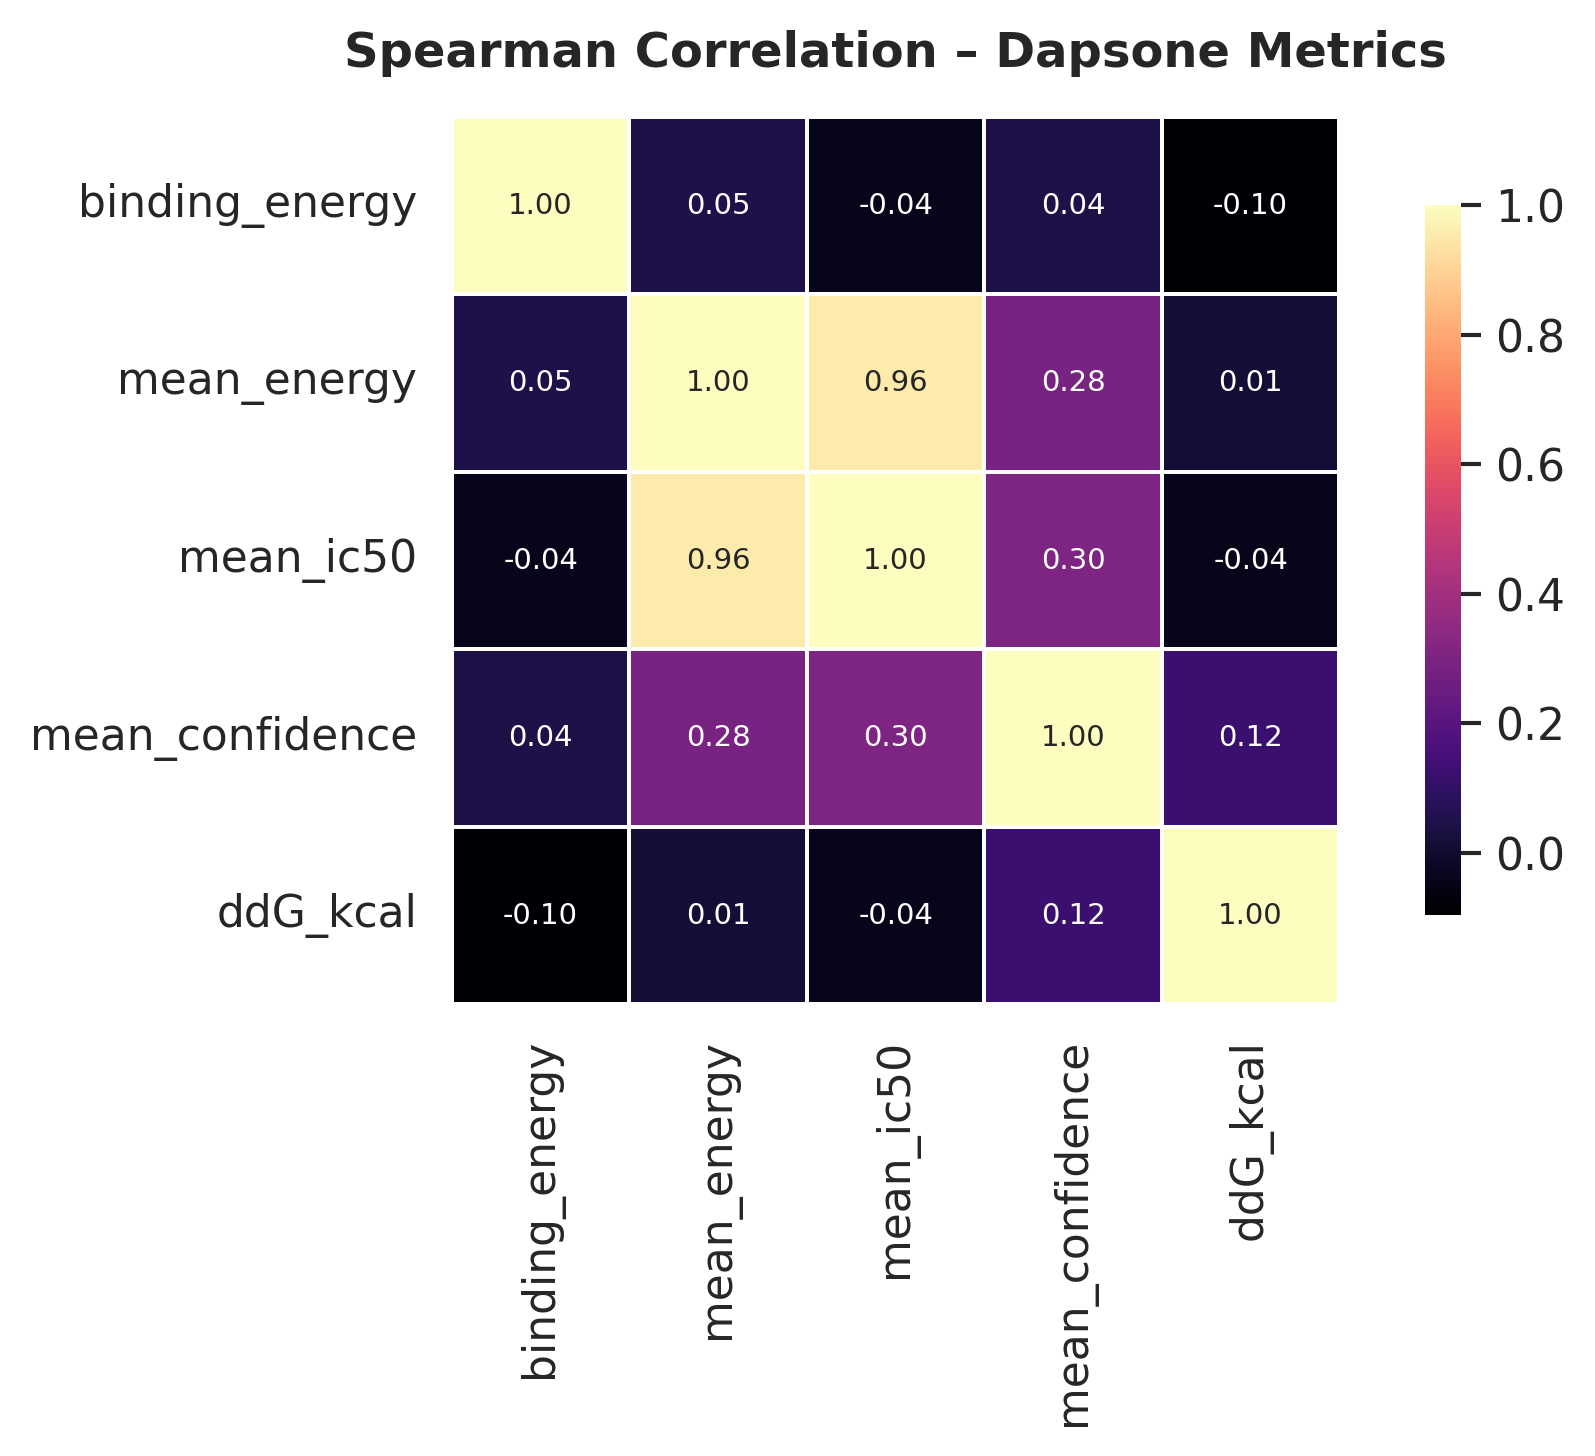

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", context="paper", font_scale=1.2)

cols_corr = ["binding_energy", "mean_energy", "mean_ic50",
             "mean_confidence", "ddG_kcal"]

corr = df[cols_corr].corr(method="spearman")

plt.figure(figsize=(7, 5), dpi=300)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    annot_kws={"size": 7},
    square=True,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"shrink": 0.8}
)

plt.title("Spearman Correlation – Dapsone Metrics", weight="bold", pad=12)
plt.tight_layout()

plt.savefig("heatmap_dapsone.png", dpi=600, bbox_inches="tight")
plt.show()


In [12]:
df["trend"] = df["ddg_class"].replace({
    "Estabiliza": "Stabilizing",
    "Estabiliza (ΔΔG < -1)": "Stabilizing",
    "Estabiliza levemente (ΔΔG < 0)": "Stabilizing",

    "Desestabiliza": "Destabilizing",
    "Desestabiliza levemente (ΔΔG > 0)": "Destabilizing",
    "Desestabiliza forte (ΔΔG > 5)": "Destabilizing"
})


In [13]:
palette = {
    "Stabilizing": "#4daf4a",
    "Destabilizing": "#e41a1c"
}


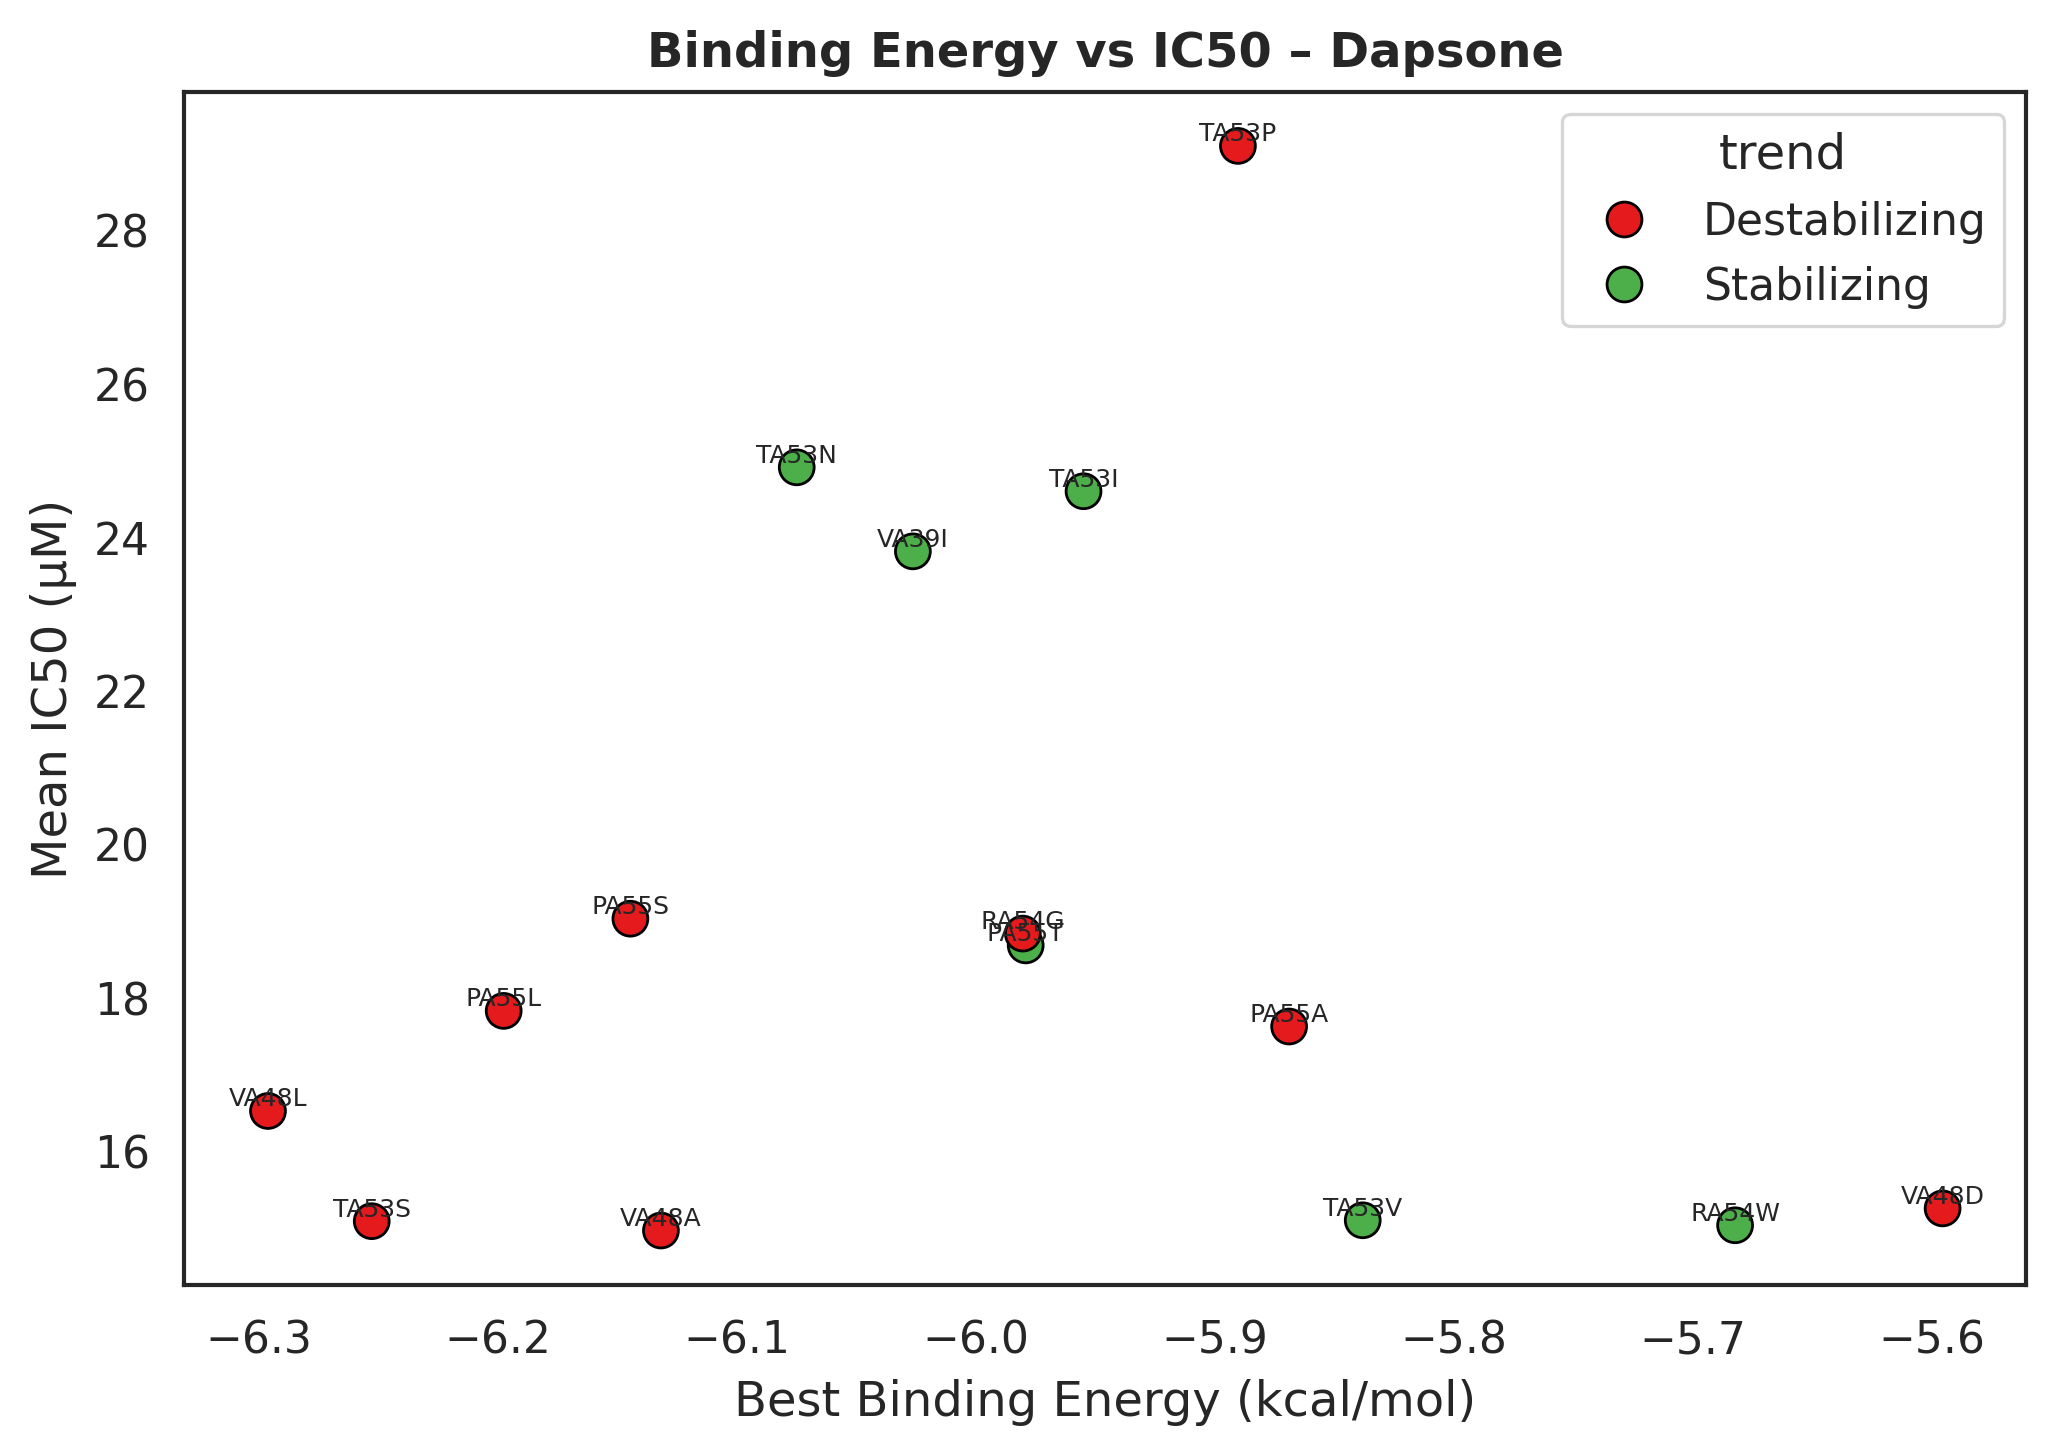

In [15]:
plt.figure(figsize=(7, 5), dpi=300)

sns.scatterplot(
    data=df,
    x="binding_energy",
    y="mean_ic50",
    hue="trend",
    palette=palette,
    s=70,
    edgecolor="black"
)

for _, row in df.iterrows():
    plt.text(row.binding_energy, row.mean_ic50,
             row.mutation, fontsize=6, ha="center", va="bottom")

plt.xlabel("Best Binding Energy (kcal/mol)")
plt.ylabel("Mean IC50 (µM)")
plt.title("Binding Energy vs IC50 – Dapsone", weight="bold")

plt.tight_layout()
plt.savefig("scatter_dapsone.png", dpi=600, bbox_inches="tight")
plt.show()



In [16]:
from google.colab import files
files.download("scatter_dapsone.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cols_pca = ["binding_energy", "mean_confidence",
            "mean_ic50", "ddG_kcal"]

df_pca = df[cols_pca].dropna().copy()
df_p = df.loc[df_pca.index].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df_p["PC1"] = X_pca[:,0]
df_p["PC2"] = X_pca[:,1]
df_p["PC3"] = X_pca[:,2]

v1, v2, v3 = [x*100 for x in pca.explained_variance_ratio_]


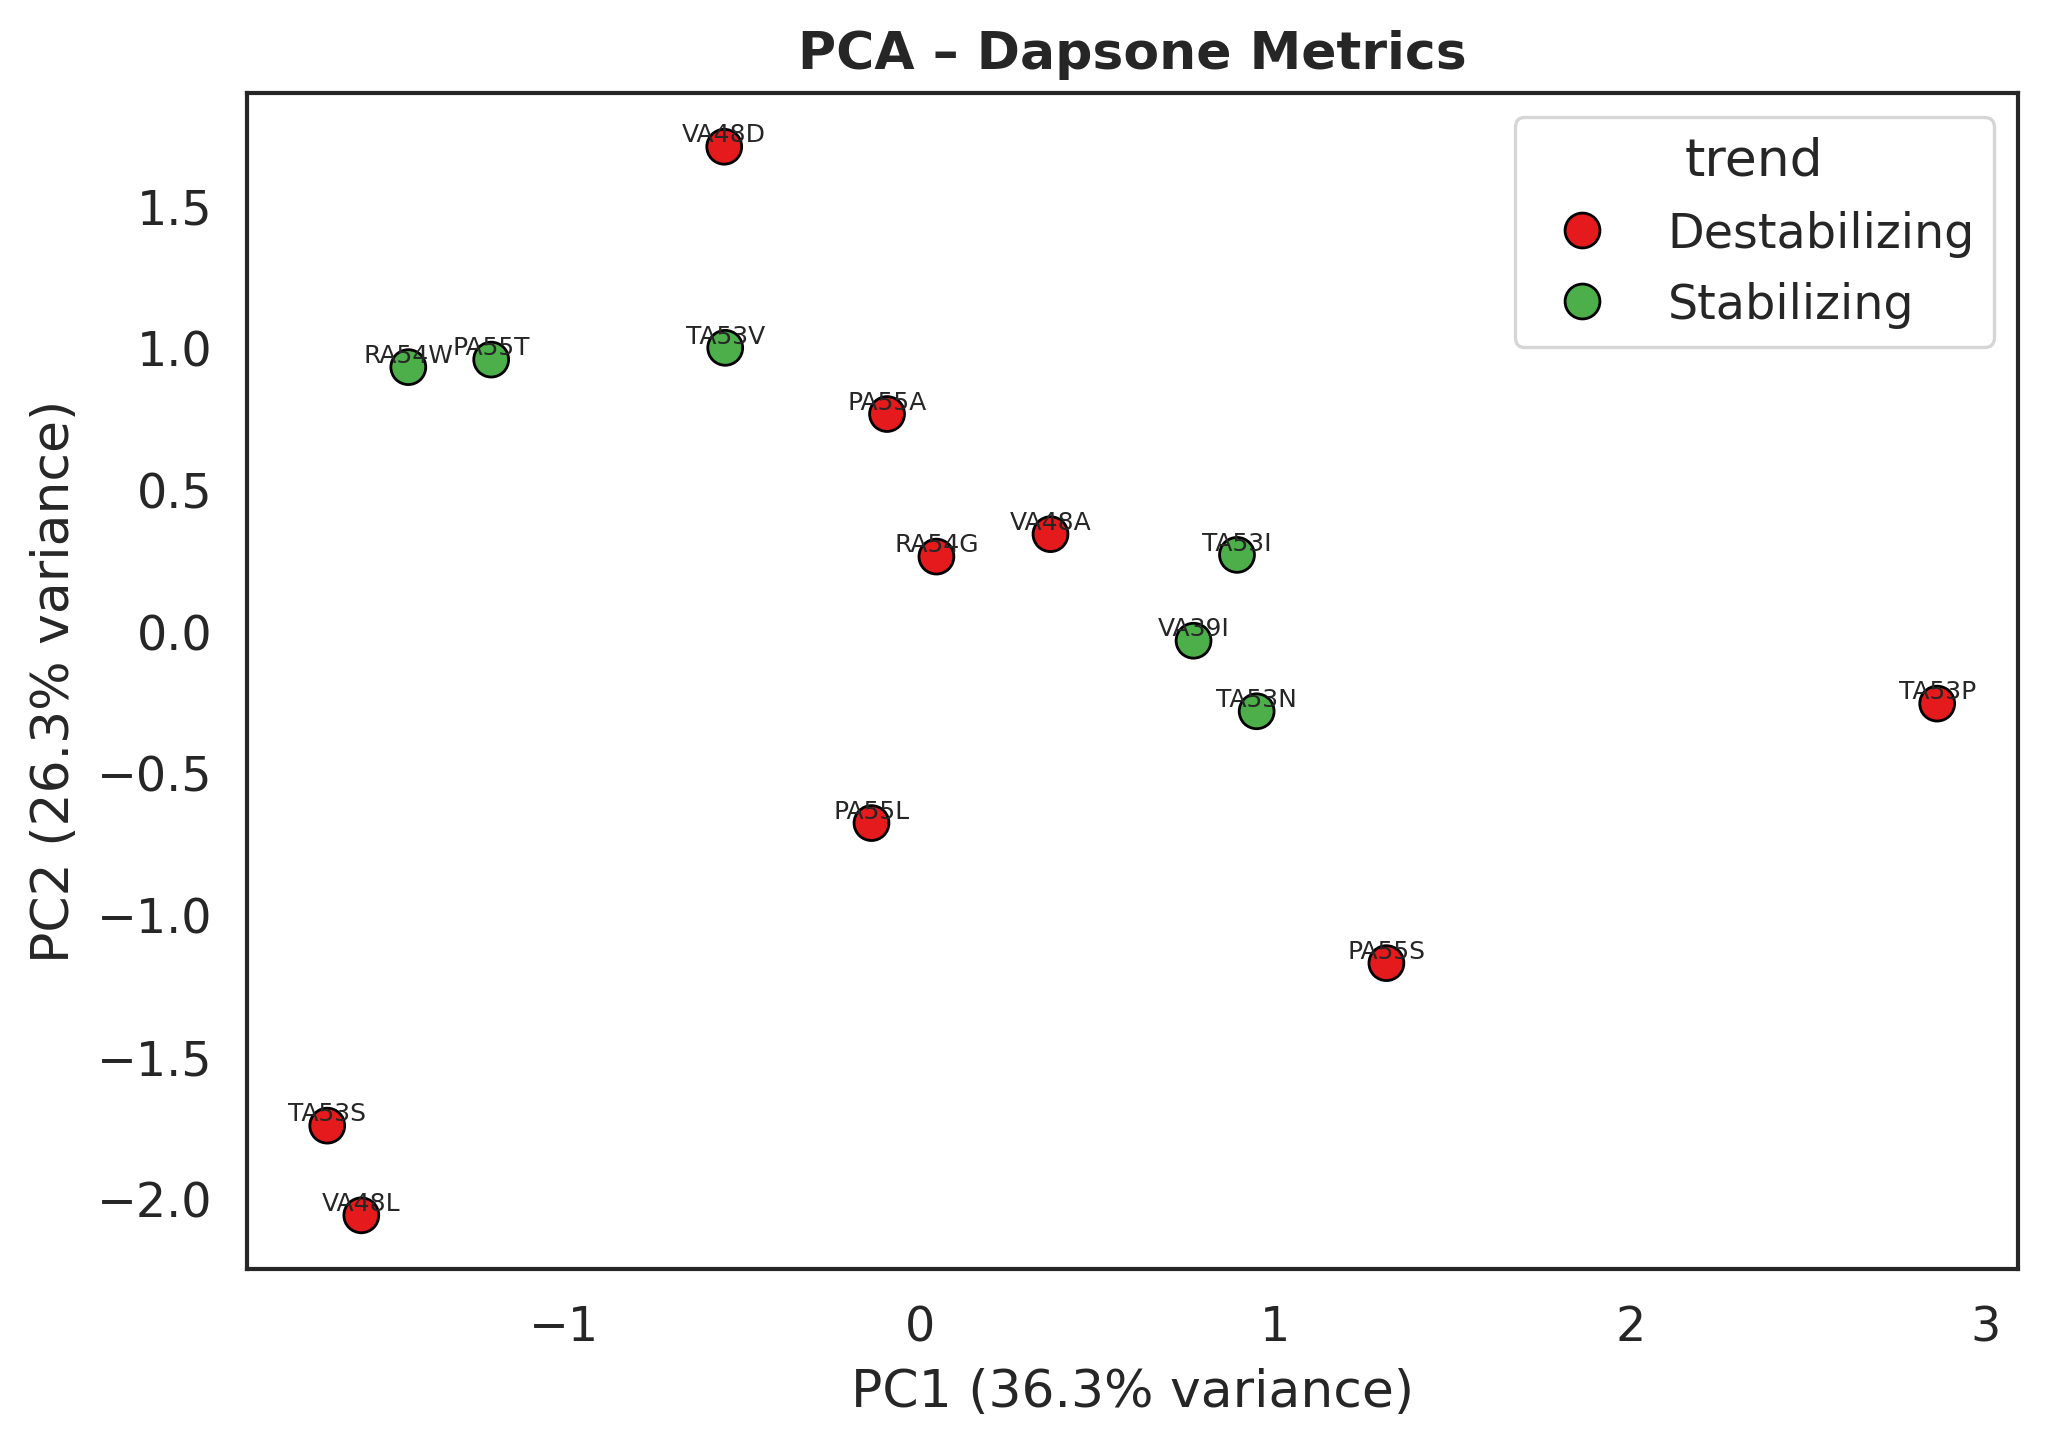

In [18]:
sns.set_theme(style="white", context="paper", font_scale=1.3)

plt.figure(figsize=(7,5), dpi=300)

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70, edgecolor="black"
)

for _, row in df_p.iterrows():
    plt.text(row.PC1, row.PC2, row.mutation,
             fontsize=6, ha="center", va="bottom")

plt.xlabel(f"PC1 ({v1:.1f}% variance)")
plt.ylabel(f"PC2 ({v2:.1f}% variance)")
plt.title("PCA – Dapsone Metrics", weight="bold")

plt.tight_layout()
plt.savefig("PCA2D_dapsone.png", dpi=600, bbox_inches="tight")
plt.show()


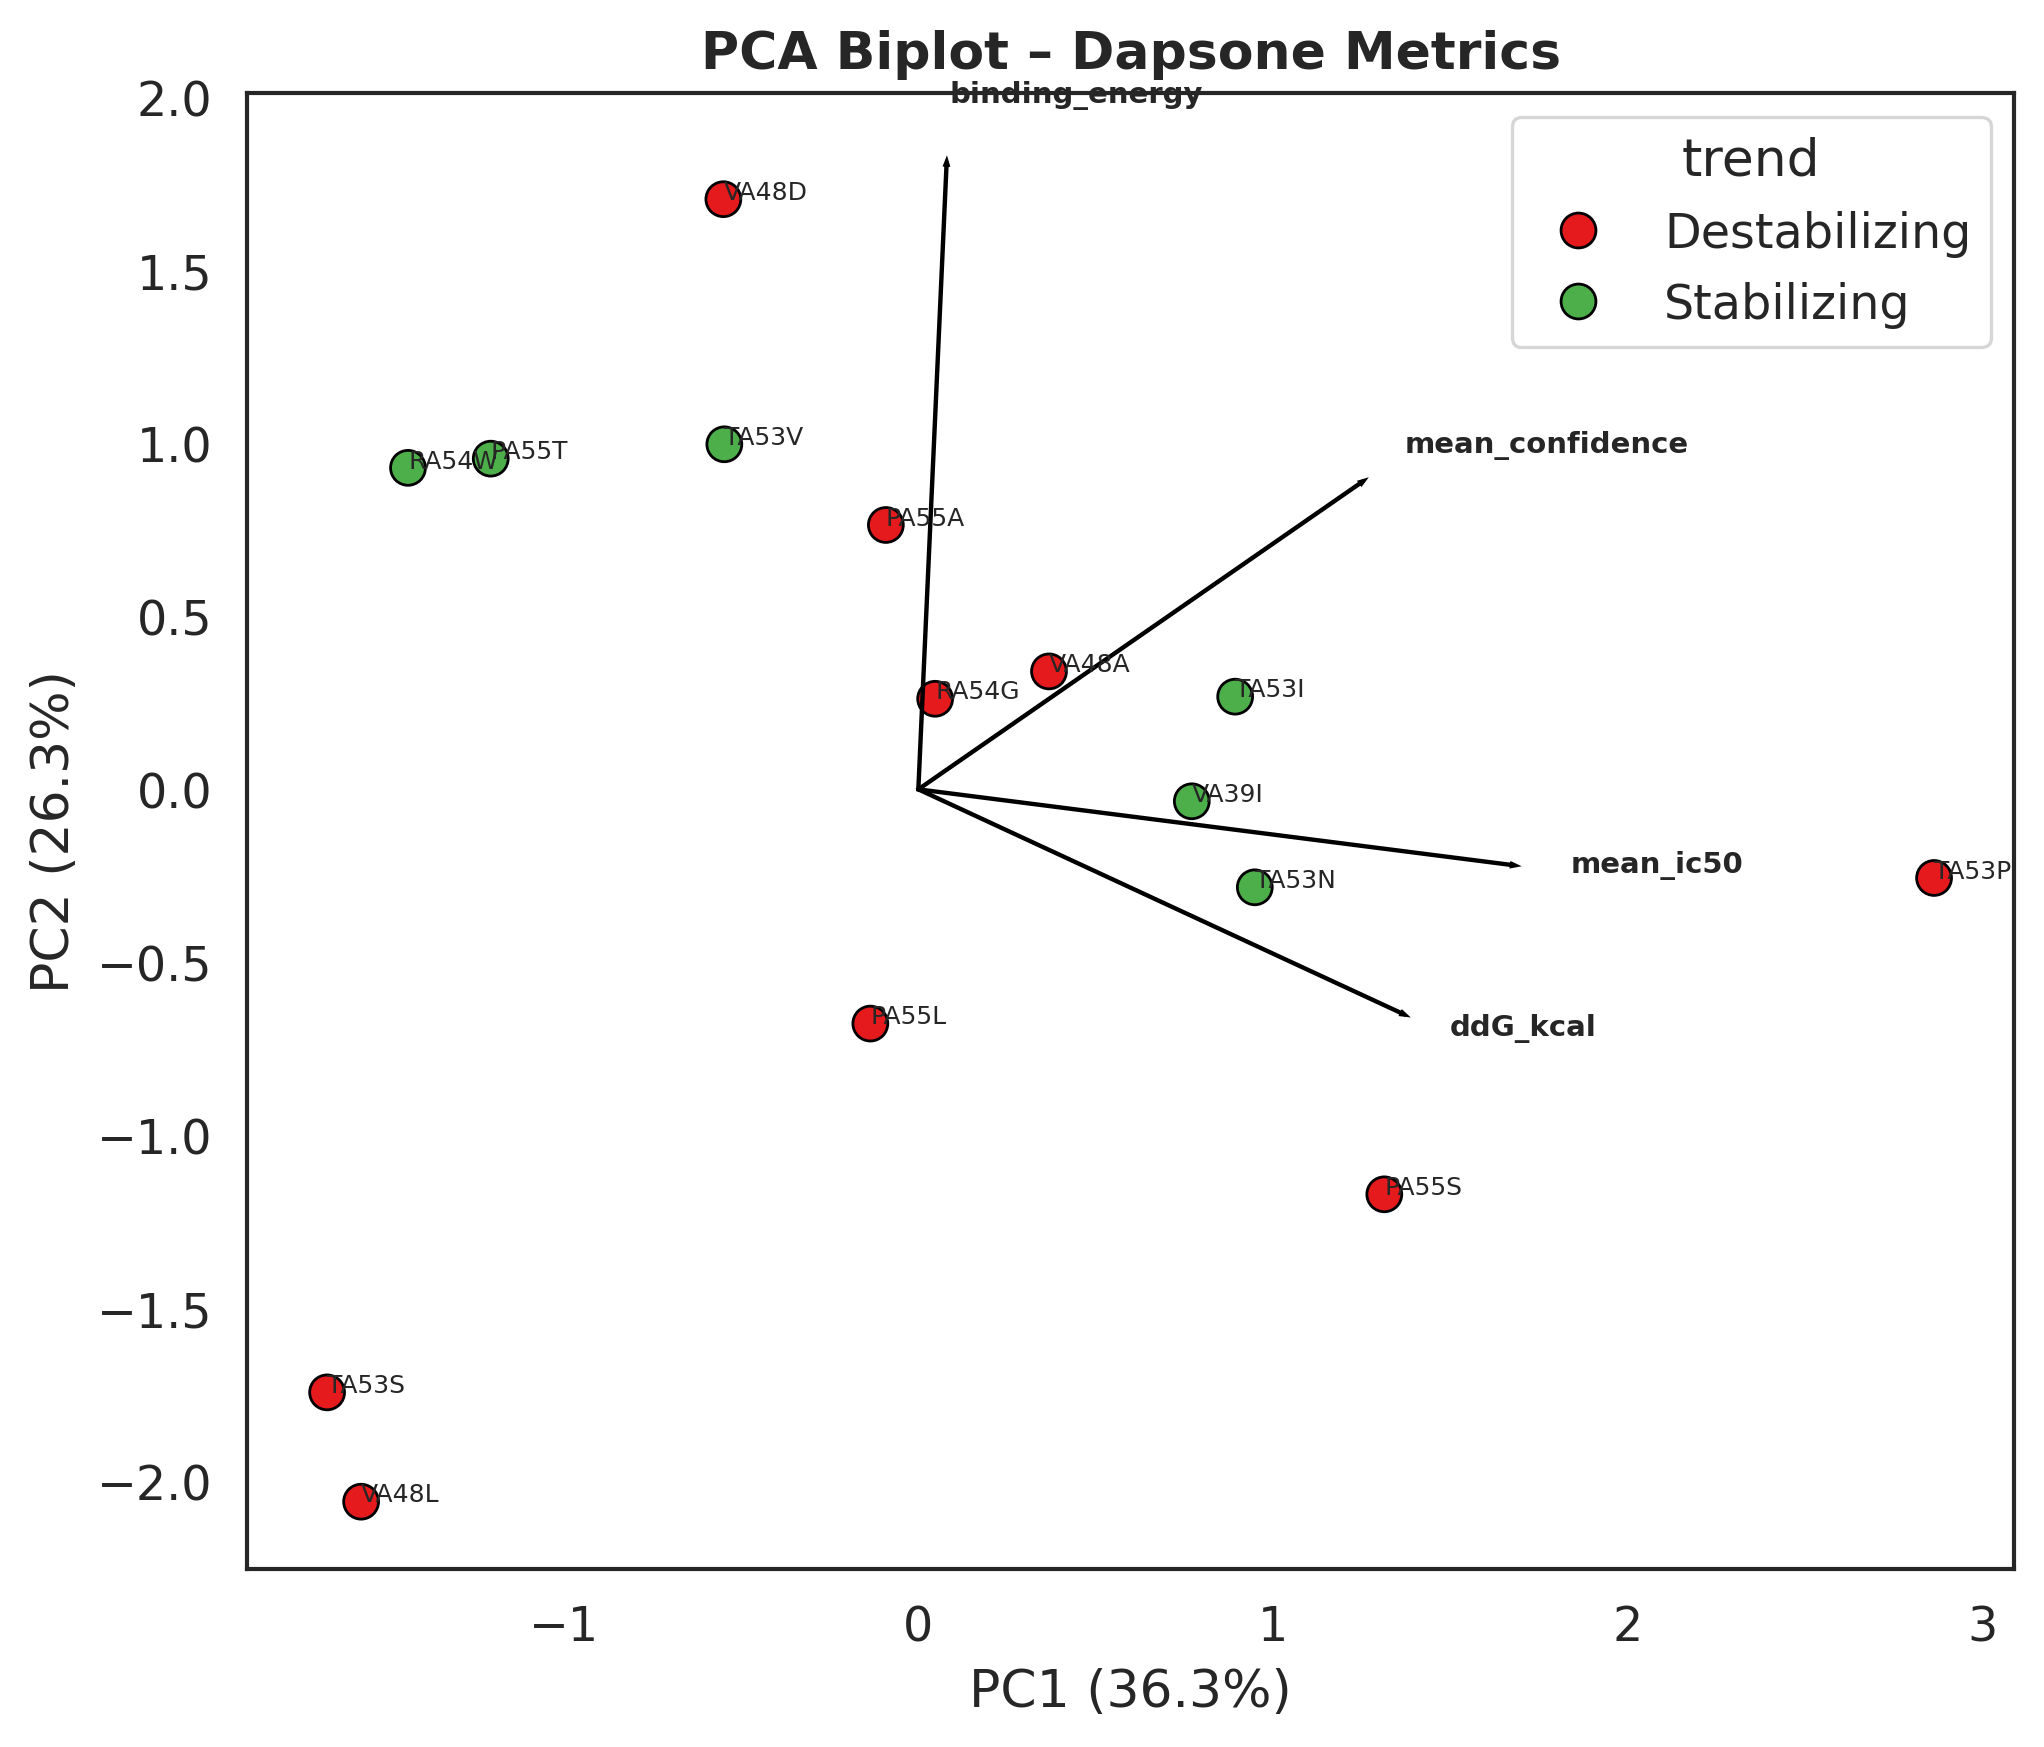

In [19]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(7,6), dpi=300)

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70, edgecolor="black"
)

for _, row in df_p.iterrows():
    plt.text(row.PC1, row.PC2,
             row.mutation, fontsize=6)

# Loadings
for i, var in enumerate(cols_pca):
    plt.arrow(0,0, loadings[i,0]*2, loadings[i,1]*2,
              color="black", width=0.003)
    plt.text(loadings[i,0]*2.2,
             loadings[i,1]*2.2, var,
             fontsize=7, weight="bold")

plt.xlabel(f"PC1 ({v1:.1f}%)")
plt.ylabel(f"PC2 ({v2:.1f}%)")
plt.title("PCA Biplot – Dapsone Metrics", weight="bold")

plt.tight_layout()
plt.savefig("PCA_Biplot_dapsone.png", dpi=600, bbox_inches="tight")
plt.show()


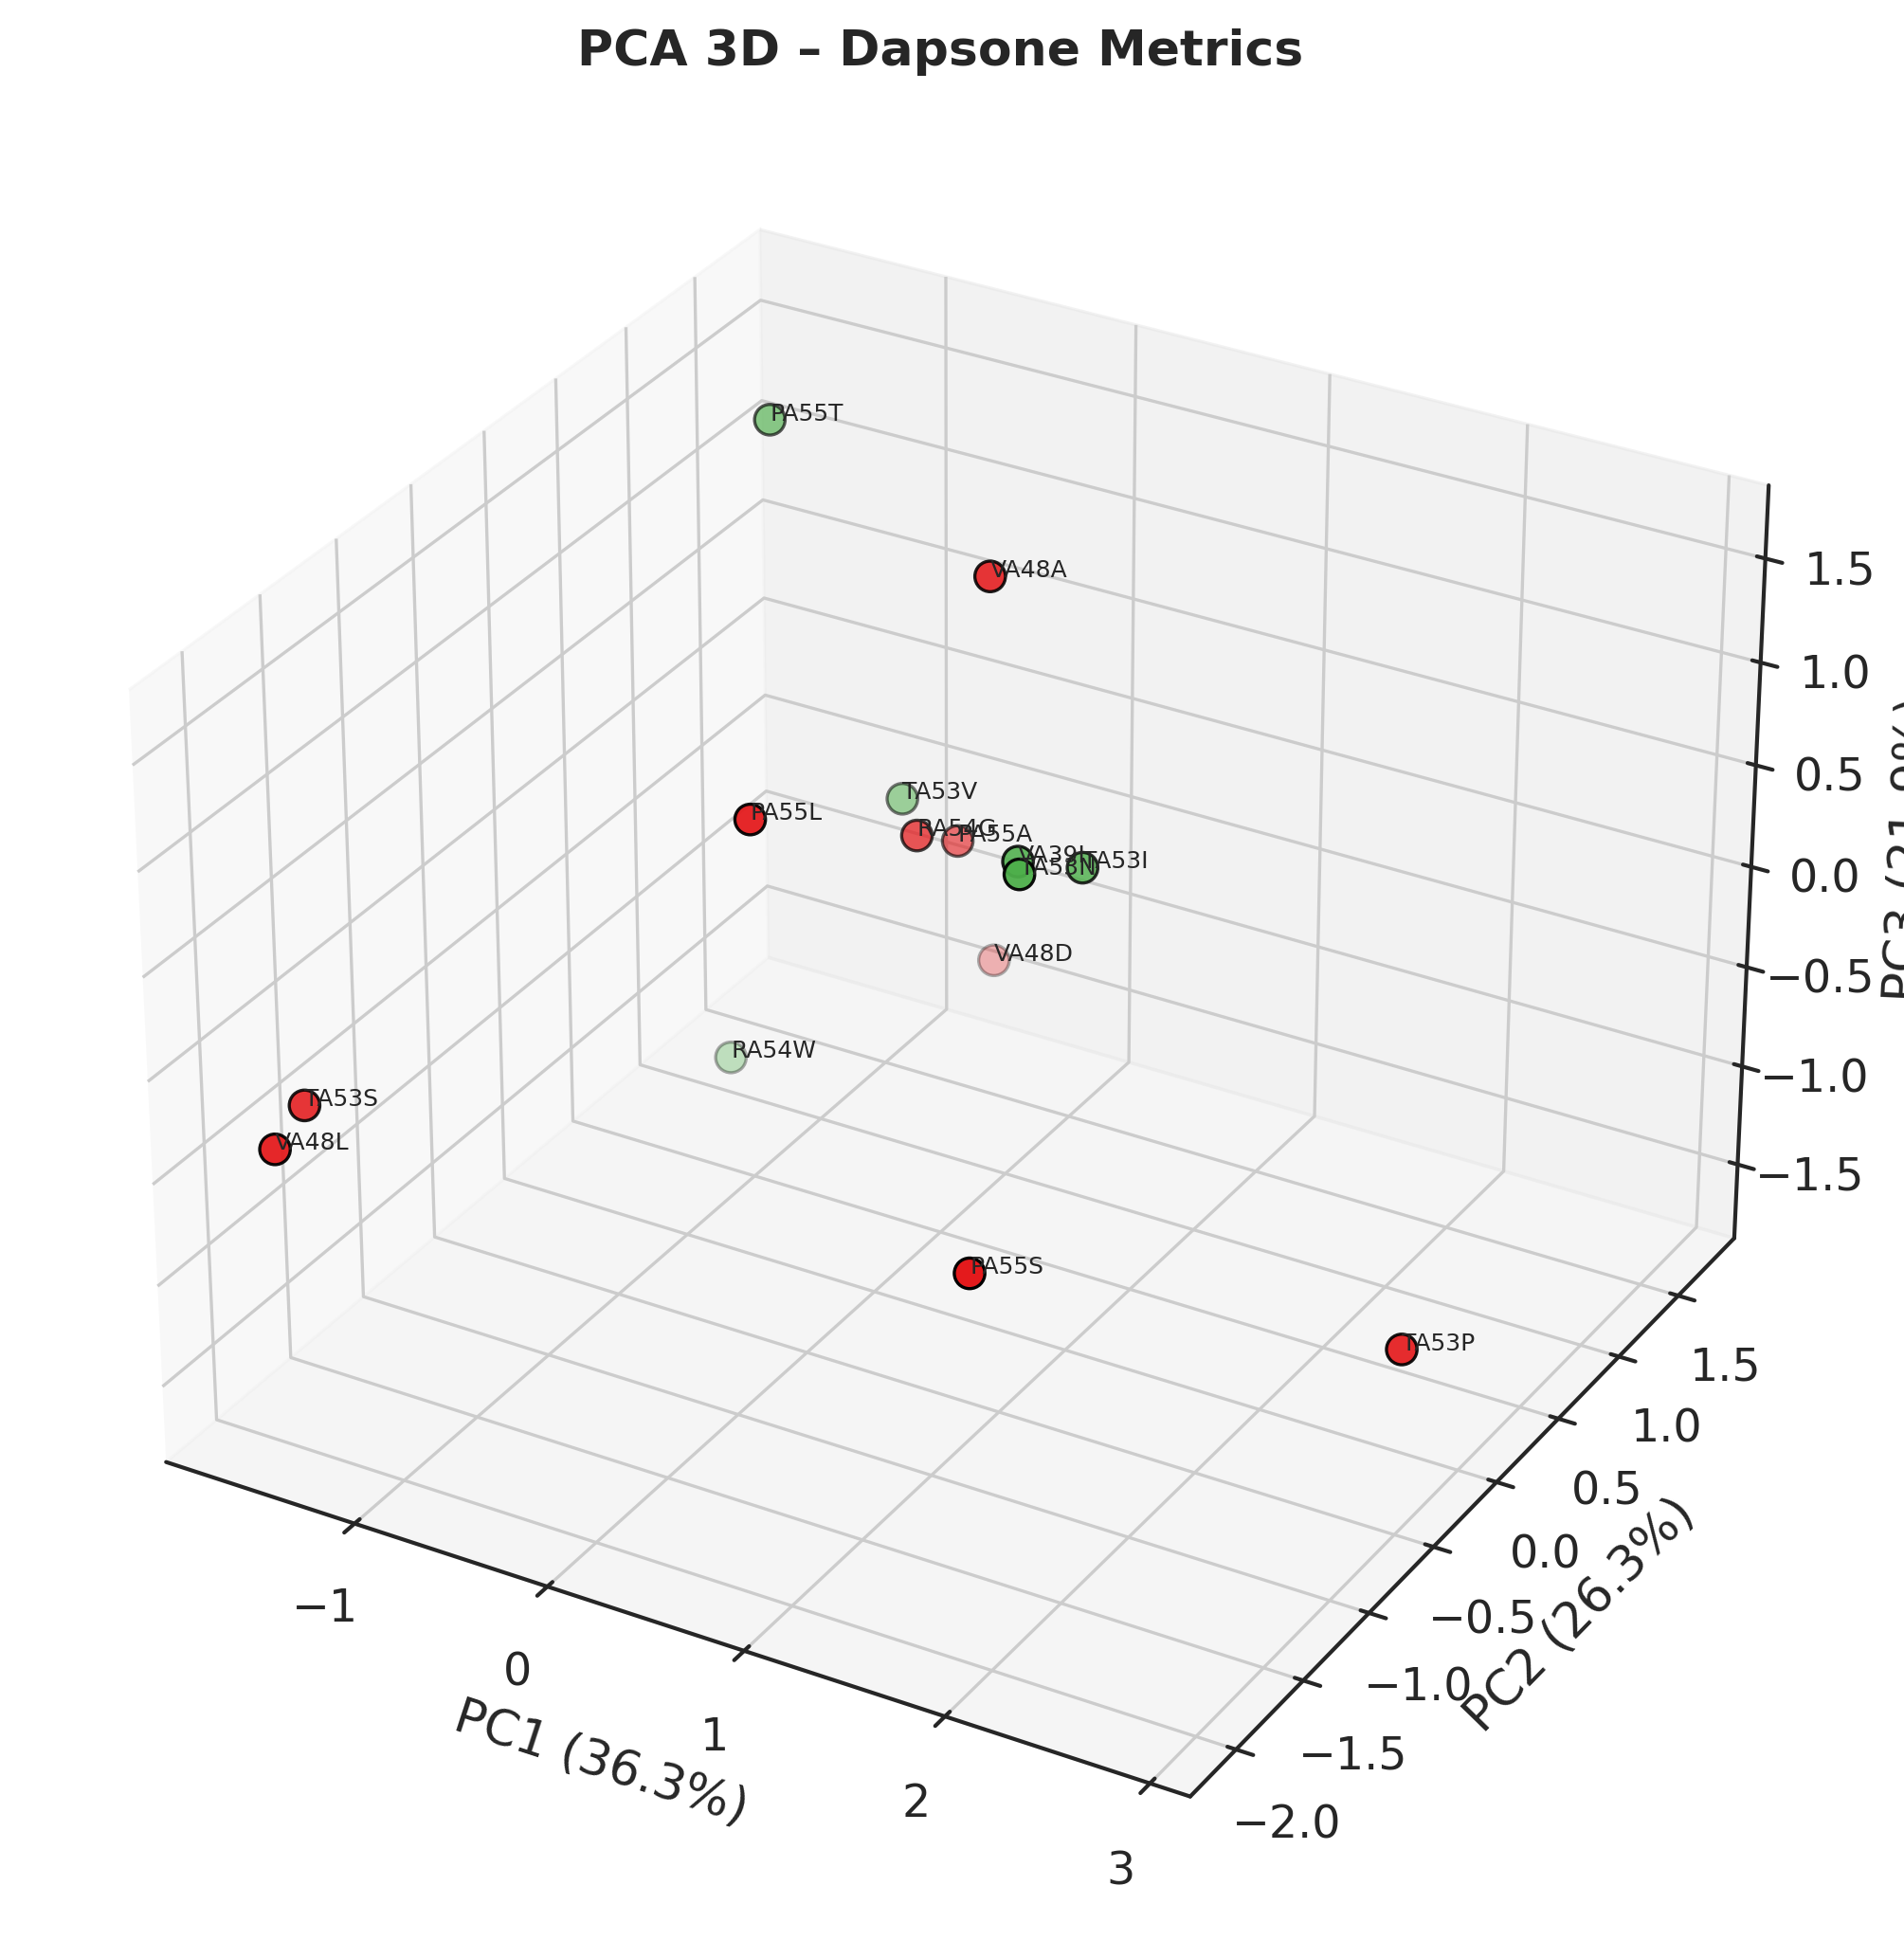

In [20]:
fig = plt.figure(figsize=(9,7), dpi=300)
ax = fig.add_subplot(111, projection='3d')

colors = df_p["trend"].map(palette)

ax.scatter(df_p.PC1, df_p.PC2, df_p.PC3,
           c=colors, s=60, edgecolor="black")

for _, row in df_p.iterrows():
    ax.text(row.PC1, row.PC2, row.PC3,
            row.mutation, fontsize=6)

ax.set_xlabel(f"PC1 ({v1:.1f}%)")
ax.set_ylabel(f"PC2 ({v2:.1f}%)")
ax.set_zlabel(f"PC3 ({v3:.1f}%)")
ax.set_title("PCA 3D – Dapsone Metrics", weight="bold")

plt.tight_layout()
plt.savefig("PCA3D_dapsone.png", dpi=600, bbox_inches="tight")
plt.show()


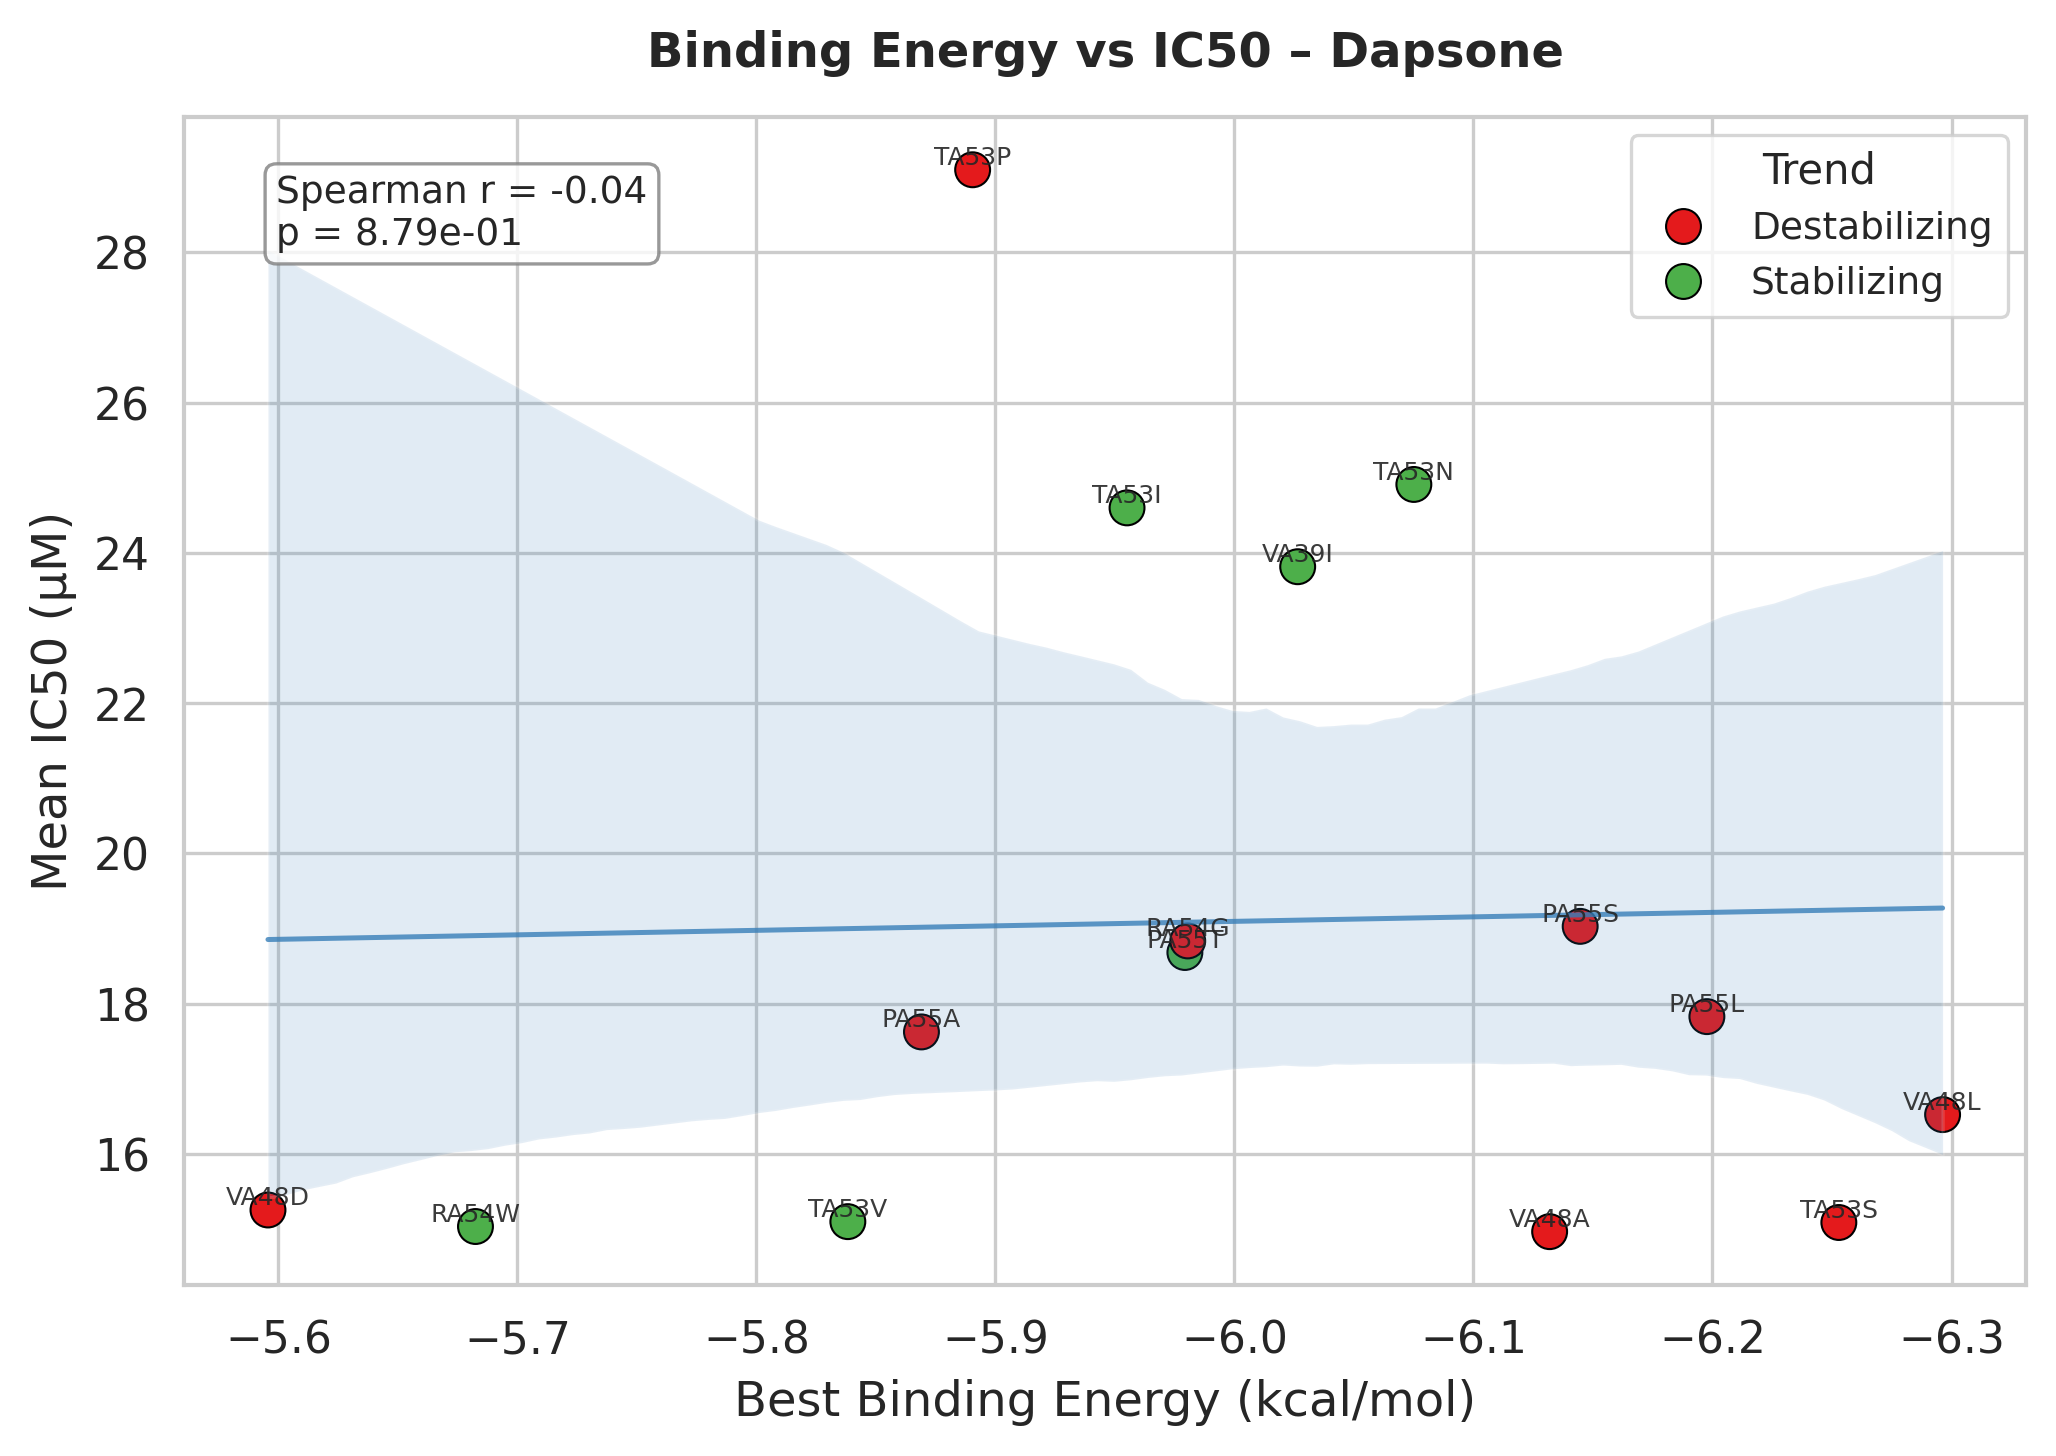

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

# Scatter com cores por tendência
sns.scatterplot(
    data=df,
    x="binding_energy",
    y="mean_ic50",
    hue="trend",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

# Linha de regressão global (sem separar por grupo)
sns.regplot(
    data=df,
    x="binding_energy",
    y="mean_ic50",
    scatter=False,
    color="#377eb8",      # azul
    ax=ax,
    line_kws={"linewidth": 1.2, "alpha": 0.8}
)

# Opcional: inverter eixo X se quiser mais negativo à direita
ax.invert_xaxis()

# Nomes das mutações
for _, row in df.iterrows():
    ax.text(
        row["binding_energy"],
        row["mean_ic50"],
        row["mutation"],
        fontsize=6,
        ha="center",
        va="bottom",
        alpha=0.9
    )

# Spearman para colocar no gráfico
rho, pval = spearmanr(df["binding_energy"], df["mean_ic50"])

ax.set_xlabel("Best Binding Energy (kcal/mol)")
ax.set_ylabel("Mean IC50 (µM)")
ax.set_title("Binding Energy vs IC50 – Dapsone", weight="bold", pad=12)

# Texto com correlação no canto
ax.text(
    0.05, 0.95,
    f"Spearman r = {rho:.2f}\np = {pval:.2e}",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)

ax.legend(title="Trend", fontsize=9, title_fontsize=10, loc="best")

plt.tight_layout()
plt.savefig(
    "scatter_corr_dapsone_binding_ic50.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.05
)
plt.show()


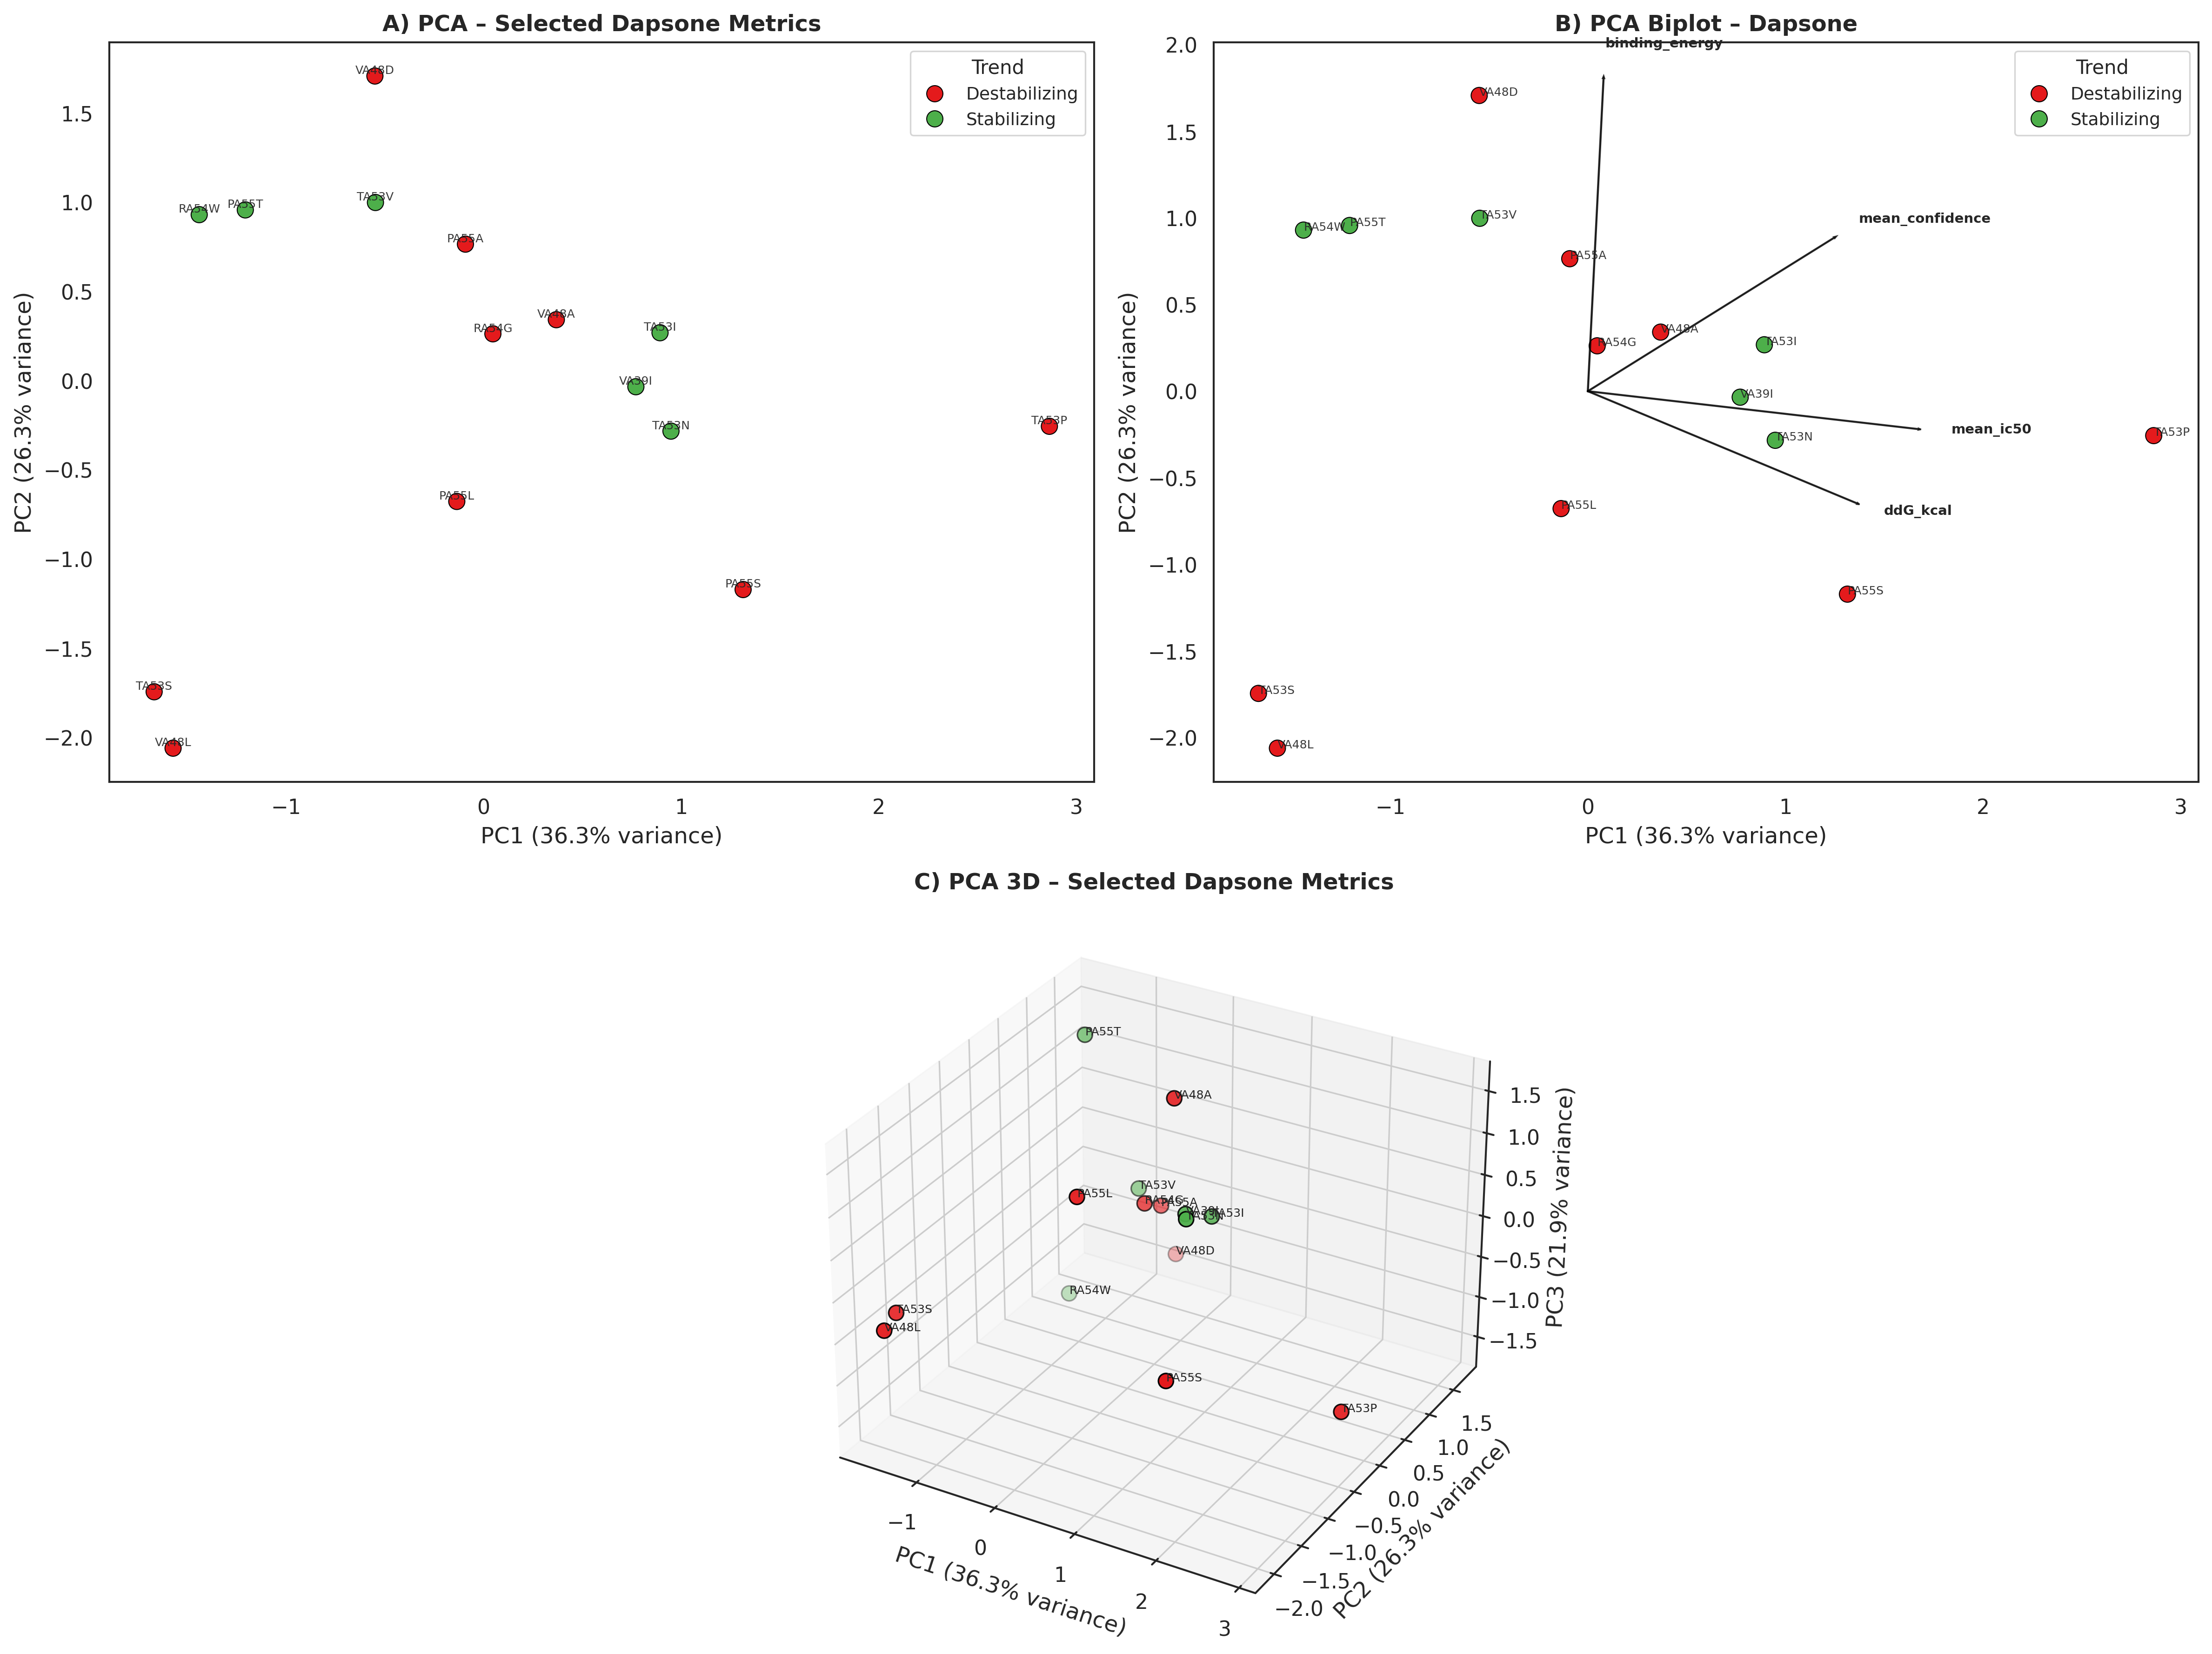

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

sns.set_theme(style="white", context="paper", font_scale=1.2)

palette = {
    "Stabilizing": "#4daf4a",
    "Destabilizing": "#e41a1c"
}

fig = plt.figure(figsize=(16, 12), dpi=300)
gs = GridSpec(2, 2, figure=fig)

# ----------------------------
# PANEL A – PCA 2D
# ----------------------------
ax1 = fig.add_subplot(gs[0, 0])

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    ax=ax1
)

for _, row in df_p.iterrows():
    ax1.text(row.PC1, row.PC2, row.mutation,
             fontsize=6, ha="center", va="bottom", alpha=0.9)

ax1.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax1.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax1.set_title("A) PCA – Selected Dapsone Metrics", weight="bold")
ax1.legend(title="Trend", fontsize=9, title_fontsize=10)

# ----------------------------
# PANEL B – Biplot
# ----------------------------
ax2 = fig.add_subplot(gs[0, 1])

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    ax=ax2
)

for _, row in df_p.iterrows():
    ax2.text(row.PC1, row.PC2, row.mutation,
             fontsize=6, alpha=0.9)

for i, var in enumerate(cols_pca):
    ax2.arrow(
        0, 0,
        loadings[i, 0] * 2,
        loadings[i, 1] * 2,
        color="black",
        alpha=0.8,
        width=0.003
    )
    ax2.text(
        loadings[i, 0] * 2.2,
        loadings[i, 1] * 2.2,
        var,
        fontsize=7,
        weight="bold"
    )

ax2.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax2.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax2.set_title("B) PCA Biplot – Dapsone", weight="bold")
ax2.legend(title="Trend", fontsize=9, title_fontsize=10)

# ----------------------------
# PANEL C – PCA 3D (embaixo)
# ----------------------------
ax3 = fig.add_subplot(gs[1, :], projection="3d")

colors = df_p["trend"].map(palette)

ax3.scatter(
    df_p["PC1"],
    df_p["PC2"],
    df_p["PC3"],
    c=colors,
    s=60,
    edgecolor="black"
)

for _, row in df_p.iterrows():
    ax3.text(row.PC1, row.PC2, row.PC3,
             row.mutation, fontsize=6)

ax3.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax3.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax3.set_zlabel(f"PC3 ({v3:.1f}% variance)")
ax3.set_title("C) PCA 3D – Selected Dapsone Metrics", weight="bold")

plt.tight_layout()

# 🔹 salvar em alta resolução
plt.savefig(
    "Multipanel_PCA_dapsone.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.1,
    facecolor="white"
)

plt.show()


In [24]:
from google.colab import files

files.download("scatter_corr_dapsone_binding_ic50.png")
files.download("PCA2D_dapsone.png")
files.download("PCA_Biplot_dapsone.png")
files.download("PCA3D_dapsone.png")
files.download("Multipanel_PCA_dapsone.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>